# SOPHY Database
### Southern Ocean Phytoplankton Database
- Made by Ayush Nag and Hannah-Joy Warren (add others)
- UW Oceanography (add other credits)

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from shapely.geometry import Polygon
import cartopy.crs as ccrs
import fiona
import numpy as np
import shapely
import geopandas as gpd
import pyproj
from shapely.ops import transform
from geolabel import GeoLabel

In [2]:
con = sqlite3.connect("sophy.db")
cur = con.cursor()

In [2]:
GeoLabel.create_fronts_zones_shapes()

Success! Shapefiles generated


C:\Users\Ayush Nag\miniconda3\envs\sophyenv\lib\site-packages\geopandas\geodataframe.py:2352: UserWarning: `keep_geom_type=True` in overlay resulted in 6 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


<GeoAxesSubplot:>

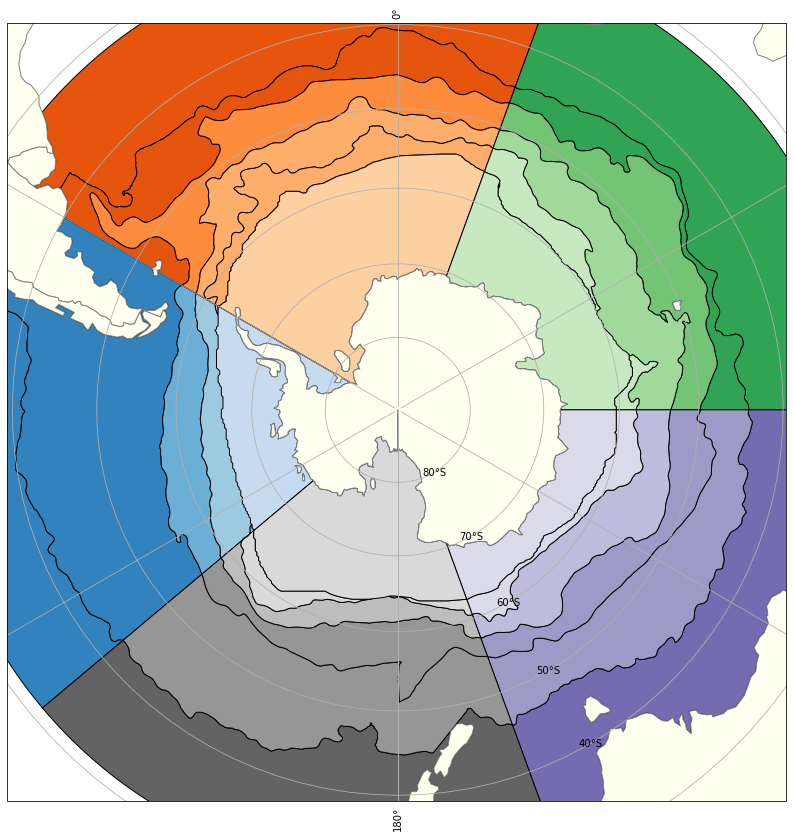

In [5]:
# Write some functions here that interact with sqlite and can plot the data
map_proj = ccrs.SouthPolarStereo()
project = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), pyproj.CRS('EPSG:3031'), always_xy=True).transform
fig = plt.figure(figsize=[12, 12])  # inches
ax = plt.subplot(projection=map_proj)
# ax.set_facecolor('k')
ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

# ax.add_feature(cartopy.feature.LAND)
ax.gridlines(draw_labels=True)

# np.dstack((pie_lat, pie_lon))
s1 = transform(project, Polygon(zip(np.append(np.linspace(start=-130, stop=-60, num=1000), 0), np.append(np.full(1000, -30), -90))))
s2 = transform(project, Polygon(zip(np.append(np.linspace(start=-60, stop=20, num=1000), 0), np.append(np.full(1000, -30), -90))))
s3 = transform(project, Polygon(zip(np.append(np.linspace(start=20, stop=90, num=1000), 0), np.append(np.full(1000, -30), -90))))
s4 = transform(project, Polygon(zip(np.append(np.linspace(start=90, stop=160, num=1000), 0), np.append(np.full(1000, -30), -90))))
s5 = transform(project, Polygon(zip(np.append(np.append(np.linspace(start=160, stop=180, num=500), np.linspace(start=-180, stop=-130, num=500)), 0), np.append(np.full(1000, -30), -90))))
s: list = [s1, s2, s3, s4, s5]
sectors = gpd.GeoDataFrame(geometry=s, crs='EPSG:3031')
# xs, ys = p.exterior.xy
# ax.fill(xs, ys, alpha=0.1, fc='r', ec='none')

zones: gpd.GeoDataFrame = gpd.read_file(GeoLabel.zones_shapefile)
res = zones.overlay(sectors, how='intersection')
res.plot(ax=ax, cmap="tab20c", edgecolor='k')

world: gpd.GeoDataFrame = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.to_crs(epsg=3031).plot(ax=ax, color='ivory', edgecolor='grey')

# sample_df: DataFrame = pd.read_csv('../data/datasets/lter.csv', encoding='unicode_escape')
# data_gdf = gpd.GeoDataFrame(sample_df, geometry=gpd.points_from_xy(sample_df.Longitude, sample_df.Latitude), crs='EPSG:4326')
# data_gdf.to_crs(crs='EPSG:3031', inplace=True)
# data_gdf.plot(ax=ax, color='b')
# ['SAZ', 'PFZ', 'ASZ', 'SOZ', 'SIZ']

# occ_df: DataFrame = pd.read_csv('../data/datasets/phytobase.csv', encoding='unicode_escape')
# occ_df = occ_df[occ_df['decimalLatitude'] < -30]
# data_gdf = gpd.GeoDataFrame(occ_df, geometry=gpd.points_from_xy(occ_df.decimalLongitude, occ_df.decimalLatitude), crs='EPSG:4326')
# data_gdf.to_crs(crs='EPSG:3031', inplace=True)
# data_gdf.plot(ax=ax, color='b')

# ax.scatter(occ_df.decimalLongitude, occ_df.decimalLatitude, marker='o', color='g', transform=ccrs.PlateCarree())
